In [1]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

color_opencv = cv2.imread('../sample/1.tiff', 1)
gray_opencv = cv2.imread('../sample/1.tiff', 0)

color_skimage = io.imread('../sample/1.tiff', as_gray=False)
gray_skimage = io.imread('../sample/1.tiff', as_gray=True)

In [ ]:
B, G, R = cv2.split(color_opencv)



cv2.imshow('Original Image', color_opencv)
cv2.imshow('G', G)
cv2.imshow('B', B)
cv2.imshow('R', R)

while True:
    key = cv2.waitKey(0)
    if key in [27, ord('q'), ord('Q')]:
        cv2.destroyAllWindows()

In [ ]:
hsv_image = cv2.cvtColor(color_opencv, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)



cv2.imshow('Original Image', color_opencv)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

while True:
    key = cv2.waitKey(0)
    if key in [27, ord('q'), ord('Q')]:
        cv2.destroyAllWindows()

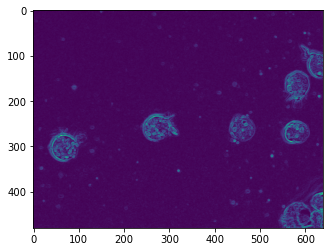

In [4]:
# grayscale filters to color images

from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters, io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

img = io.imread('../sample/1.tiff')

sobel = filters.sobel(img)
plt.imshow(sobel)

In [5]:
@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)

@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

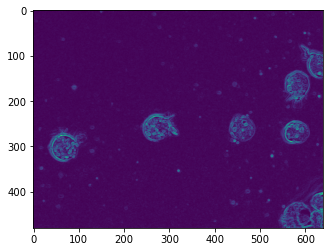

In [8]:
each_channel_image = sobel_each(img)
hsv_value_image = sobel_hsv(img)

plt.imshow(each_channel_image)

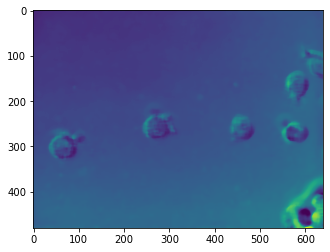

In [10]:
import cv2

@adapt_rgb(each_channel)
def median_each(image, k):
    output_image = cv2.medianBlur(image, k)
    return output_image

median_using_cv2 = median_each(img, 13)
plt.imshow(median_using_cv2)

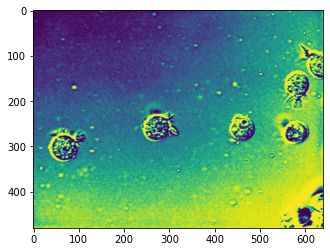

In [13]:
from skimage import exposure

@adapt_rgb(each_channel)
def eq_each(image):
    output_image = exposure.equalize_hist(image)
    return output_image

equ_RGB = eq_each(img)
plt.imshow(equ_RGB)

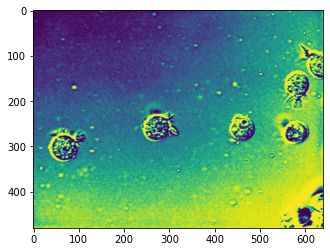

In [15]:
@adapt_rgb(hsv_value)
def eq_hsv(image):
    output_image = exposure.equalize_hist(image)
    return output_image

equ_hsv = eq_hsv(img)
plt.imshow(equ_hsv)

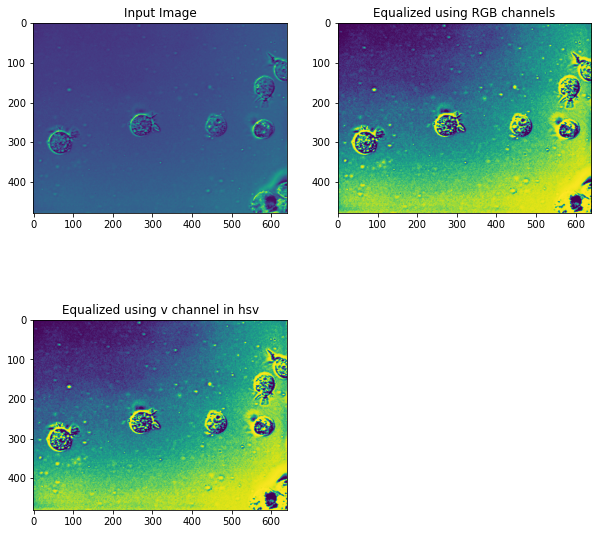

In [16]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text("Input Image")

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(equ_RGB)
ax2.title.set_text("Equalized using RGB channels")

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(equ_hsv)
ax3.title.set_text("Equalized using v channel in hsv")

plt.show()